In [1]:
from keras.datasets.mnist import load_data
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [2]:
# load the data - it returns 2 tuples of digits & labels - one for
# the train set & the other for the test set
(train_digits, train_labels), (test_digits, test_labels) = load_data()
#  some variables...
image_height = train_digits.shape[1]  
image_width = train_digits.shape[2]
num_channels = 1  # we have grayscale images
# NOTE: image_height == image_width == 28
# re-shape the images data
train_data = np.reshape(train_digits, (train_digits.shape[0], image_height, image_width, num_channels))
test_data = np.reshape(test_digits, (test_digits.shape[0],image_height, image_width, num_channels))

# re-scale the image data to values between [0,1]
train_data = train_data.astype('float32') / 255.
test_data = test_data.astype('float32') / 255.

# one-hot encode the labels - we have 10 output classes

# so 3 -> [0 0 0 1 0 0 0 0 0 0], 5 -> [0 0 0 0 0 1 0 0 0 0] & so on
num_classes = 10
train_labels_cat = to_categorical(train_labels,num_classes)
test_labels_cat = to_categorical(test_labels,num_classes)

# split training set into training and validation
train_data2, val_data,train_labels_cat2,  val_labels = train_test_split(train_data, train_labels_cat, test_size=0.1)


11490434/11490434 [==============================] - 6s 1us/step


In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
def build_model():
    model = Sequential()
    # add Convolutional layers
    model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same',
                     input_shape=(image_height, image_width, num_channels)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2)))    
    model.add(Flatten())
    # Densely connected layers
    model.add(Dense(128, activation='relu'))
    # output layer
    model.add(Dense(num_classes, activation='softmax'))
    # compile with adam optimizer & categorical_crossentropy loss function
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = build_model()


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-03-01 23:46:51.230931: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-01 23:46:51.231962: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
history = model.fit(train_data2, train_labels_cat2, 
                    epochs=5, batch_size=64,
                    validation_data=(val_data, val_labels))


Epoch 1/5
844/844 [==============================] - 15s 18ms/step - loss: 0.0100 - accuracy: 0.9970 - val_loss: 0.0271 - val_accuracy: 0.9925
Epoch 2/5
844/844 [==============================] - 15s 18ms/step - loss: 0.0089 - accuracy: 0.9968 - val_loss: 0.0347 - val_accuracy: 0.9915
Epoch 3/5
844/844 [==============================] - 15s 18ms/step - loss: 0.0083 - accuracy: 0.9973 - val_loss: 0.0308 - val_accuracy: 0.9923
Epoch 4/5
844/844 [==============================] - 15s 18ms/step - loss: 0.0067 - accuracy: 0.9976 - val_loss: 0.0325 - val_accuracy: 0.9920
Epoch 5/5
844/844 [==============================] - 16s 19ms/step - loss: 0.0061 - accuracy: 0.9982 - val_loss: 0.0415 - val_accuracy: 0.9905


<Axes: >

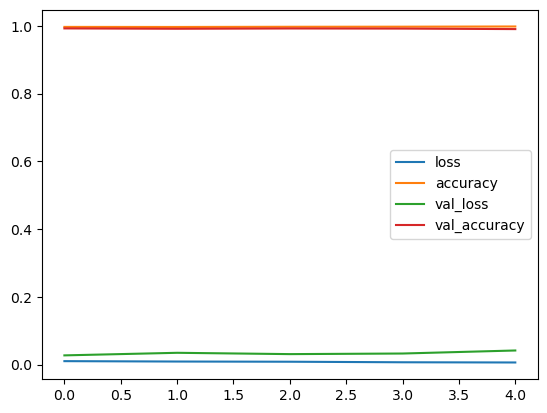

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot()

In [8]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels_cat, batch_size=64)
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))

157/157 [==============================] - 1s 9ms/step - loss: 0.0402 - accuracy: 0.9904
Test loss: 0.0402 accuracy: 0.9904
